In [1]:
!pip install tensorflow
!pip install matplotlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_data_dir = '/content/drive/MyDrive/archive (1)/train'
test_data_dir ='/content/drive/MyDrive/archive (1)/test'




In [3]:
img_size = (48, 48)
batch_size = 25

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [4]:
# Loading training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Loading validation data
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Loading test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2039 images belonging to 2 classes.
Found 509 images belonging to 2 classes.
Found 308 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Define the input shape
input_shape = (img_size[0], img_size[1], 3)

# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(512, activation='relu'))  # Additional layer
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 5120)              0         
                                                                 
 dense_5 (Dense)             (None, 256)               1310976   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                      

In [7]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Epoch 1/30
82/82 [==============================] - 807s 10s/step - loss: 0.7063 - accuracy: 0.6047 - val_loss: 0.7237 - val_accuracy: 0.5010
Epoch 2/30
82/82 [==============================] - 23s 285ms/step - loss: 0.6165 - accuracy: 0.6748 - val_loss: 0.6827 - val_accuracy: 0.6189
Epoch 3/30
82/82 [==============================] - 23s 278ms/step - loss: 0.6044 - accuracy: 0.6802 - val_loss: 0.7059 - val_accuracy: 0.5992
Epoch 4/30
82/82 [==============================] - 24s 290ms/step - loss: 0.5899 - accuracy: 0.7018 - val_loss: 0.6939 - val_accuracy: 0.5914
Epoch 5/30
82/82 [==============================] - 24s 297ms/step - loss: 0.5689 - accuracy: 0.7023 - val_loss: 0.6456 - val_accuracy: 0.6365
Epoch 6/30
82/82 [==============================] - 21s 254ms/step - loss: 0.5484 - accuracy: 0.7205 - val_loss: 0.6432 - val_accuracy: 0.6385
Epoch 7/30
82/82 [==============================] - 23s 276ms/step - loss: 0.5421 - accuracy: 0.7371 - val_loss: 0.7014 - val_accuracy: 0.6110


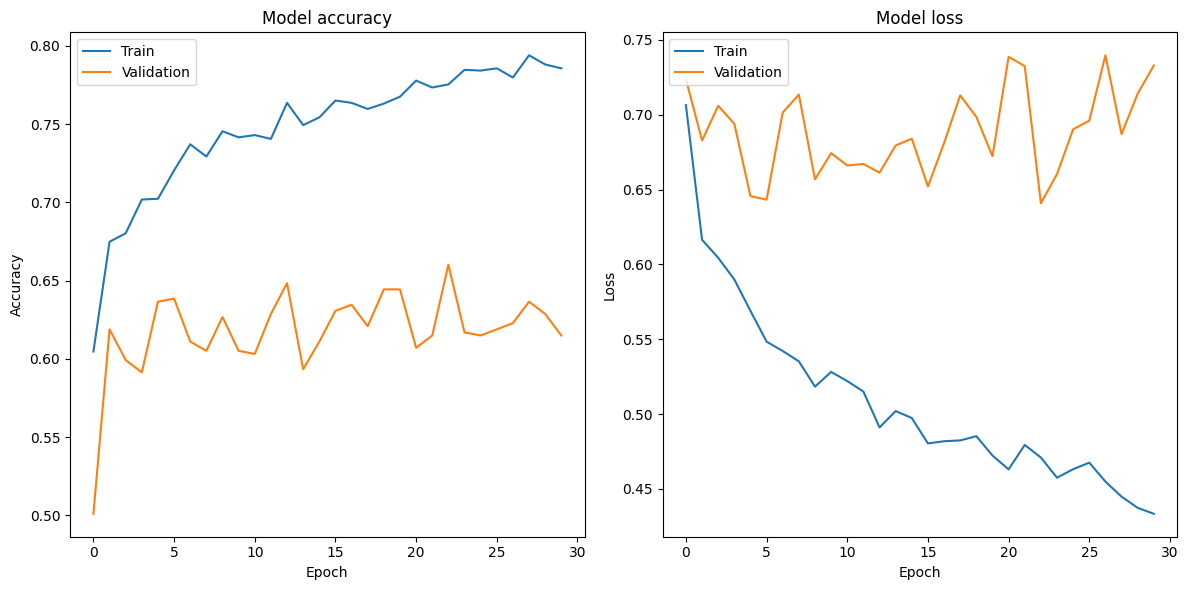

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path
image_path = '/content/drive/MyDrive/archive (1)/test/autistic/003.jpg'

img = image.load_img(image_path, target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1

predictions = model.predict(img_array)
#outcome
emotion_labels = ['Surprise', 'Delight', 'Sadness', 'Fear', 'Joy', 'Anger']
predicted_emotion = emotion_labels[np.argmax(predictions)]

# Print the predicted emotion
print(f'The predicted emotion is: {predicted_emotion}')

1/1 [==============================] - 5s 5s/step
The predicted emotion is: Surprise


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Predict test labels
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Calculate classification report
target_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f'F1 Score: {f1}')


13/13 [==============================] - 2s 130ms/step - loss: 0.5878 - accuracy: 0.7338
Test accuracy: 0.7337662577629089
13/13 [==============================] - 2s 123ms/step
Accuracy: 0.7324675324675324
Classification Report:
              precision    recall  f1-score   support

    autistic       0.73      0.61      0.66       150
non_autistic       0.64      0.75      0.69       158

    accuracy                           0.63       308
   macro avg       0.63      0.63      0.62       308
weighted avg       0.63      0.63      0.63       308

Confusion Matrix:
[[ 81  89]
 [ 75 103]]
F1 Score: 0.7252963577775608
